In [1]:
#Importing necessary libraries

import matplotlib.pyplot as plt #for visualisation of complex data
import seaborn as sns #for visualisation of 
import numpy as np  # linear algebra
import pandas as pd # data processing
from sklearn.linear_model import LogisticRegression #for algo of logistic regression
from sklearn.metrics import accuracy_score,confusion_matrix #for evaluation of prediction model
from sklearn.model_selection import train_test_split     #for data splitting
from sklearn.preprocessing import StandardScaler

### Data Reading

In [2]:
data=pd.read_csv('bmi.csv',low_memory=False)     #Reading data from csv
df=pd.DataFrame(data)                                #The dataset is loaded into a DataFrame named df.

### Data Inspection

In [3]:
#Displaying the first few rows of the dataset
print("First few values: \n")
df.head()

First few values: 



,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [4]:
#Displaying the information about the dataset
df.info()
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB



In [5]:
#Counting the number of null values in each column
null_Val=df.isnull().sum() 
print("No. of null values: \n",null_Val)
print()

No. of null values: 
 Gender    0
Height    0
Weight    0
Index     0
dtype: int64



There are no null values so we don't need to drop any cols.

### Preprocessing

In [6]:
df['Gender']=df['Gender'].map({'Male':0,'Female':1})  #Encoding values of male and female

#Distribution of features and label
X=df[['Gender','Height','Weight']]
Y=df['Index']

In [7]:
#Splitting the data into training and testing
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)


In [8]:
#Standardizing the features
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

### Model Training

In [9]:
model=LogisticRegression(max_iter=500)
model.fit(X_train,Y_train)

LogisticRegression(max_iter=500)

In [10]:
#Prediction
y_pred=model.predict(X_test)

#Evaluation
accuracy=accuracy_score(Y_test,y_pred)
conf_matrix=confusion_matrix(Y_test,y_pred)

In [11]:
#Printing the evaluation result

#accuracy = total correct values / total no. of values

print(f"Model Accuracy: {accuracy} and Confusion Matrix:")
print(conf_matrix)

Model Accuracy: 0.92 and Confusion Matrix:
[[ 0  1  0  0  0  0]
 [ 0  3  1  0  0  0]
 [ 0  0 16  2  0  0]
 [ 0  0  1  7  0  0]
 [ 0  0  0  0 28  2]
 [ 0  0  0  0  1 38]]


In [12]:
#taking user input
print("Enter your details")
Gender=int(input("\n 0 for Male, 1 for Female: "))
Height=int(input("\n Enter Height in cm(int): "))
Weight=int(input("\n Enter Weight in kg(int): "))

#processing user input
user_data=scaler.transform([[Gender,Height,Weight]])
prediction=model.predict(user_data)

print(f"Prediction for user input (0 or 1): {prediction[0]}")

Enter your details



 0 for Male, 1 for Female:  1

 Enter Height in cm(int):  149

 Enter Weight in kg(int):  45


Prediction for user input (0 or 1): 2


/home/guest/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### Creating Decision Boundary

### Heatmap of Correlation Matrix

Text(0.5, 1.0, '\nCorrelation Matrix\n')

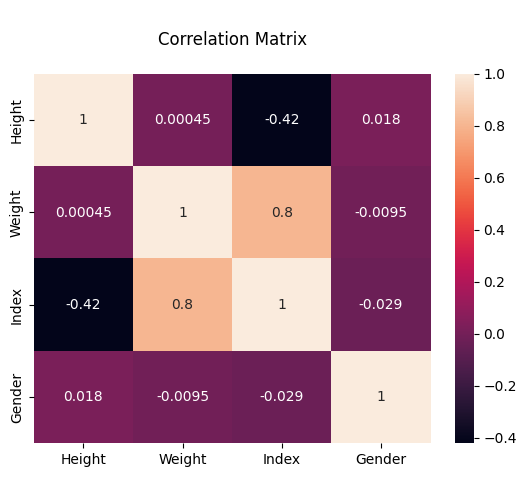

In [15]:
sns.heatmap(df[['Height','Weight','Index','Gender']].corr(),annot=True)
plt.title('\nCorrelation Matrix\n')

### Actual vs Predicted values

Text(0, 0.5, 'Predicted values\n')

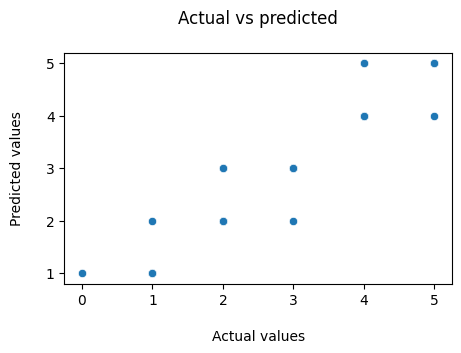

In [22]:
plt.figure(figsize=(5,3))
sns.scatterplot(x=Y_test,y=y_pred)
plt.title('Actual vs predicted\n')
plt.xlabel('\nActual values')
plt.ylabel('Predicted values\n')

### Residual Plot

Text(0, 0.5, 'Residuals\n')

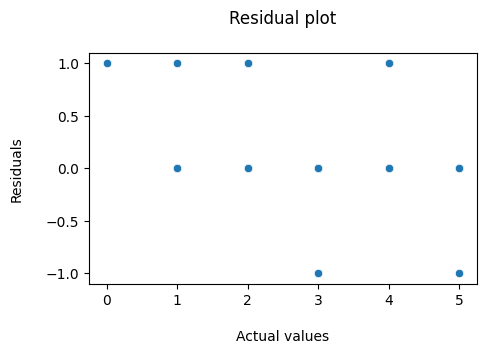

In [24]:
plt.figure(figsize=(5,3))
sns.scatterplot(x=Y_test,y=y_pred - Y_test)
plt.title('Residual plot\n')
plt.xlabel('\nActual values')
plt.ylabel('Residuals\n')


### Distribution of Predicted values

Text(0, 0.5, 'Frequency\n')

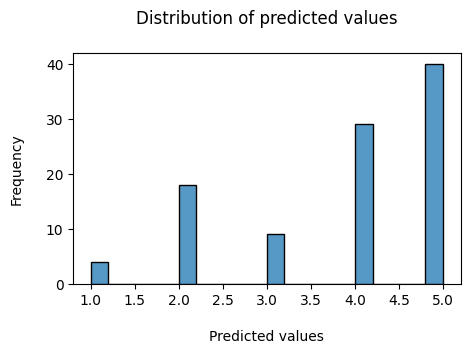

In [25]:
plt.figure(figsize=(5,3))
sns.histplot(y_pred,bins=20)
plt.title('Distribution of predicted values\n')
plt.xlabel('\nPredicted values')
plt.ylabel('Frequency\n')